In [3]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [11]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


In [22]:
import zipfile

zf = zipfile.ZipFile('./data/digit-recognizer.zip', 'r')
train_file =  zf.open('train.csv')
test_file =  zf.open('test.csv')
output_file = "./data/digit-recognizer_submission.csv"

In [6]:
raw_data = np.loadtxt(train_file, skiprows=1, dtype='int', delimiter=',')
x_train, x_val, y_train, y_val = train_test_split(
    raw_data[:,1:], raw_data[:,0], test_size=0.1)

Text(0.5,1,'28x28 data')

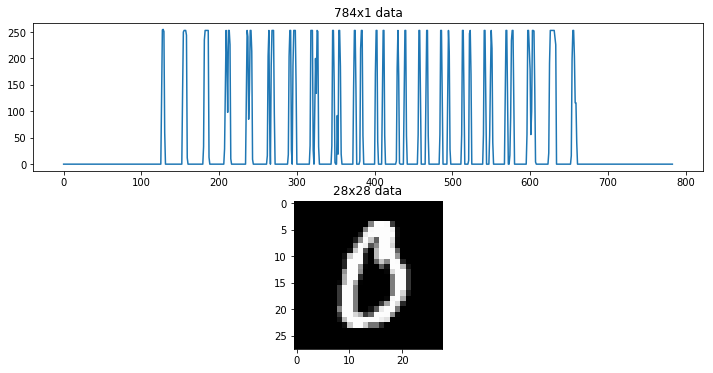

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x_train[0])
ax[0].set_title('784x1 data')
ax[1].imshow(x_train[0].reshape(28,28), cmap='gray')
ax[1].set_title('28x28 data')

In [8]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [9]:
x_train = x_train.astype("float32")/255.
x_val = x_val.astype("float32")/255.

In [12]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
#example:
print(y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [14]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [15]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [16]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [17]:
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=16),
                           steps_per_epoch=500,
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_val[:400,:], y_val[:400,:]), #For speed
                           callbacks=[annealer])

Epoch 1/20
 - 402s - loss: 0.8298 - acc: 0.7358 - val_loss: 1.2755 - val_acc: 0.6475
Epoch 2/20
 - 402s - loss: 0.3522 - acc: 0.8902 - val_loss: 0.1035 - val_acc: 0.9625
Epoch 3/20
 - 400s - loss: 0.2668 - acc: 0.9148 - val_loss: 0.0523 - val_acc: 0.9825
Epoch 4/20
 - 391s - loss: 0.2454 - acc: 0.9271 - val_loss: 0.0501 - val_acc: 0.9800
Epoch 5/20
 - 392s - loss: 0.2017 - acc: 0.9410 - val_loss: 0.0392 - val_acc: 0.9800
Epoch 6/20
 - 391s - loss: 0.1874 - acc: 0.9456 - val_loss: 0.0704 - val_acc: 0.9800
Epoch 7/20
 - 390s - loss: 0.1563 - acc: 0.9551 - val_loss: 0.0384 - val_acc: 0.9850
Epoch 8/20
 - 392s - loss: 0.1597 - acc: 0.9535 - val_loss: 0.0351 - val_acc: 0.9900
Epoch 9/20
 - 394s - loss: 0.1357 - acc: 0.9595 - val_loss: 0.0354 - val_acc: 0.9900
Epoch 10/20
 - 394s - loss: 0.1314 - acc: 0.9616 - val_loss: 0.0300 - val_acc: 0.9925
Epoch 11/20
 - 390s - loss: 0.1229 - acc: 0.9641 - val_loss: 0.0382 - val_acc: 0.9900
Epoch 12/20
 - 390s - loss: 0.1229 - acc: 0.9650 - val_loss: 0.

In [18]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0262, final accuracy: 0.9929


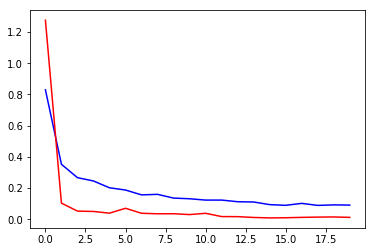

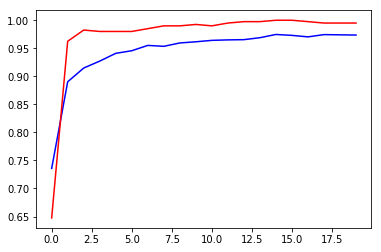

In [19]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [20]:
y_hat = model.predict(x_val)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[395   0   0   0   1   0   0   0   1   0]
 [  0 420   1   0   0   0   0   0   0   0]
 [  0   0 428   0   0   0   0   1   0   0]
 [  0   0   1 444   0   0   0   3   2   0]
 [  0   2   0   0 425   0   0   0   0   2]
 [  0   0   0   1   0 392   1   0   0   0]
 [  1   0   0   0   1   0 389   0   0   0]
 [  0   2   0   0   0   0   0 460   0   0]
 [  0   1   2   1   0   0   0   0 374   1]
 [  0   1   0   0   1   0   0   3   0 443]]


In [23]:
mnist_testset = np.loadtxt(test_file, skiprows=1, dtype='int', delimiter=',')
x_test = mnist_testset.astype("float32")
x_test = x_test.reshape(-1, 28, 28, 1)/255.

In [24]:
y_hat = model.predict(x_test, batch_size=64)

In [25]:
y_pred = np.argmax(y_hat,axis=1)

In [26]:
with open(output_file, 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))